# 🛍️ Sentiment Classification on Women's E-Commerce Reviews

## Introduction
Customer reviews are a valuable source of information in e-commerce. They capture customer opinions about products and services, reflecting satisfaction, dissatisfaction, or neutrality. However, the large volume of reviews makes it difficult to analyze them manually. To address this, Natural Language Processing (NLP) and Machine Learning (ML) methods can be applied to automatically classify reviews into sentiment categories.

In this notebook, we use a dataset of **women's clothing e-commerce reviews**. Each review contains text and a rating, which we map into three sentiment classes:

- **Negative** (ratings 1–2)  
- **Neutral** (rating 3)  
- **Positive** (ratings 4–5)  

## Objective
The main goal of this project is to **build a machine learning model** that can classify new reviews into one of the three sentiment categories (Negative, Neutral, Positive).

In [ ]:
# =============================================================================
# Install Required Packages
# =============================================================================

!pip install textblob contractions emoji wordcloud scipy scikit-learn pandas numpy matplotlib seaborn spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

# =============================================================================
#  Import All Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text preprocessing
import spacy
import re
import emoji
import contractions
from textblob import TextBlob

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Visualization
from wordcloud import WordCloud
import joblib

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# Load the Dataset

In [ ]:
# =============================================================================
# CELL 3: Load and Preview Dataset
# =============================================================================
# Load the dataset
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

print('📊 Dataset loaded successfully!')
print(f'Shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
print(f'\n📋 First 5 rows:')
print(df.head())

📊 Dataset loaded successfully!
Shape: (23486, 11)
Columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']

📋 First 5 rows:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5            

# Explatory Data Analysis (EDA)

In [ ]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.tail(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              23486 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
# Missing values per column
missing_counts = df.isna().sum().sort_values(ascending = False)
print('Missing values by column:')
print(missing_counts)

Missing values by column:
Title                      3810
Class Name                   14
Department Name              14
Division Name                14
Age                           0
Unnamed: 0                    0
Clothing ID                   0
Recommended IND               0
Rating                        0
Review Text                   0
Positive Feedback Count       0
dtype: int64


# Percentage and Count of Missing Values by Column

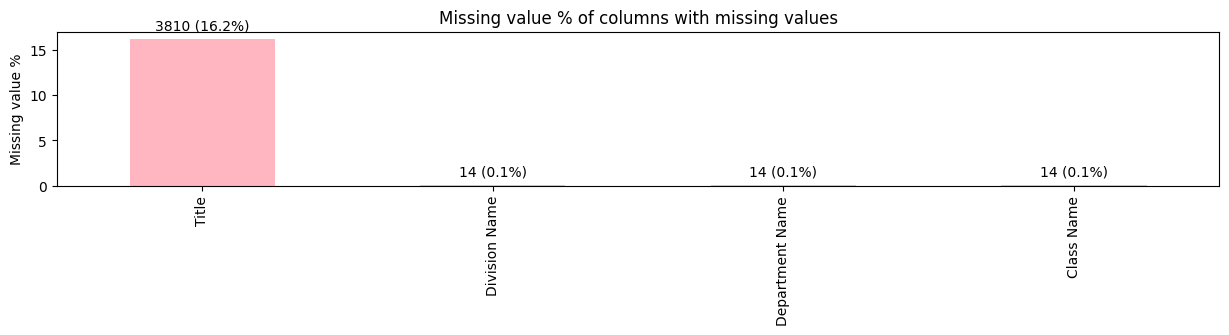

In [ ]:
# missing value % and counts
col_with_missing = [c for c in df.columns if df[c].isnull().sum() >= 1]
missing_counts = df[col_with_missing].isnull().sum().sort_values(ascending=False)
total_rows = len(df)
missing_percentages = (missing_counts / total_rows) * 100

# plot
plt.figure(figsize=(15, 2))
ax = missing_percentages.plot.bar(color='#FFB6C1')  # light pink

for i, (col, count) in enumerate(zip(missing_counts.index, missing_counts)):
    ax.text(i, missing_percentages[i] + 1, f"{count} ({missing_percentages[i]:.1f}%)", ha='center')

plt.ylabel("Missing value %")
plt.title("Missing value % of columns with missing values")
plt.show()

In [ ]:
#checking for duplicated entries
duplicates = df.duplicated().sum()
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are no duplicted rows in this data


In [ ]:
# Basic EDA: missing values, target distribution, review length, and sample texts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy to avoid SettingWithCopy warnings
eda_df = df.copy()


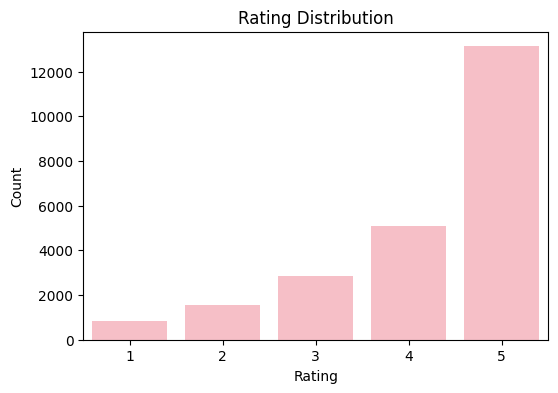

Plotted rating distribution


In [ ]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x='Rating',
    data= eda_df,
    order=sorted(eda_df['Rating'].dropna().unique()),
    color='#FFB6C1'   # light pink
)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print('Plotted rating distribution')

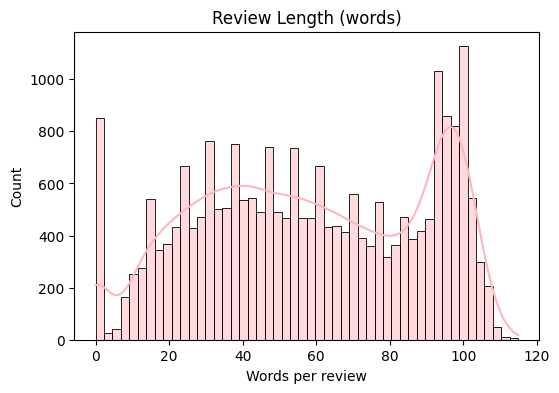

Plotted review length distribution


In [ ]:
# Review length distribution (in words)
eda_df['review_len'] = eda_df['Review Text'].fillna('').apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(
    eda_df['review_len'],
    bins=50,
    kde=True,
    color='#FFB6C1'   # light pink
)
plt.title('Review Length (words)')
plt.xlabel('Words per review')
plt.ylabel('Count')
plt.show()

print('Plotted review length distribution')

In [ ]:
# Average rating by Department
dept_avg = eda_df.groupby('Department Name')['Rating'].mean().sort_values(ascending = False)
print('Average rating by department (top 10):')
print(dept_avg.head(10))

Average rating by department (top 10):
Department Name
Bottoms     4.288760
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Dresses     4.150815
Trend       3.815126
Name: Rating, dtype: float64


# Sample Reviews for Sentiment Context

In [ ]:
# Show a few example reviews for context
print('Sample positive review:')
print(eda_df.loc[eda_df['Rating'] >= 4, 'Review Text'].dropna().head(1).values[0])
print('Sample neutral review:')
print(eda_df.loc[eda_df['Rating'] == 3, 'Review Text'].dropna().head(1).values[0])
print('Sample negative review:')
print(eda_df.loc[eda_df['Rating'] <= 2, 'Review Text'].dropna().head(1).values[0])

Sample positive review:
Absolutely wonderful - silky and sexy and comfortable
Sample neutral review:
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Sample negative review:
I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment

## Portion of Recommended vs Not Recommended Reviews

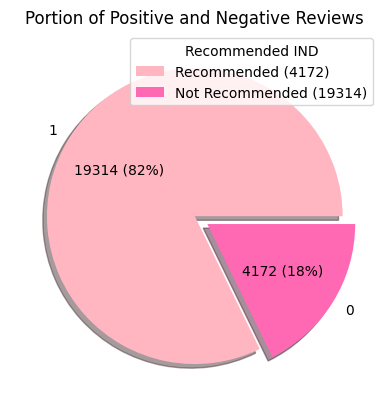

In [ ]:
# Plot dependent variable distribution
# parameters for plot
sizes = df['Recommended IND'].value_counts()
labels = ["1", "0"]
explode = (0, 0.1)  # pull out second slice by 10%
colors = ['#FFB6C1', '#FF69B4']  # light pink & deep pink

# Pie chart
plt.pie(
    x=sizes,
    labels=labels,
    explode=explode,
    shadow=True,
    autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes) / 100, p),
    colors=colors
)
plt.title('Portion of Positive and Negative Reviews')
plt.legend(
    title="Recommended IND",
    loc="upper right",
    labels=[f"Recommended ({sizes[0]})", f"Not Recommended ({sizes[1]})"]
)
plt.show()


### Age Distribution

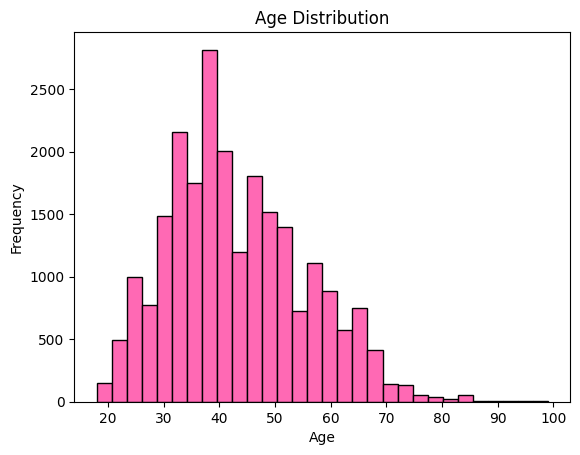

Age stats:


,Age
count,23486.000000
mean,43.198544
std,12.279544
min,18.000000
25%,34.000000
50%,41.000000
75%,52.000000
max,99.000000


In [ ]:
# Age distribution
df['Age'].plot(kind='hist', bins=30, color='#FF69B4', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Age stats:")
df['Age'].describe()



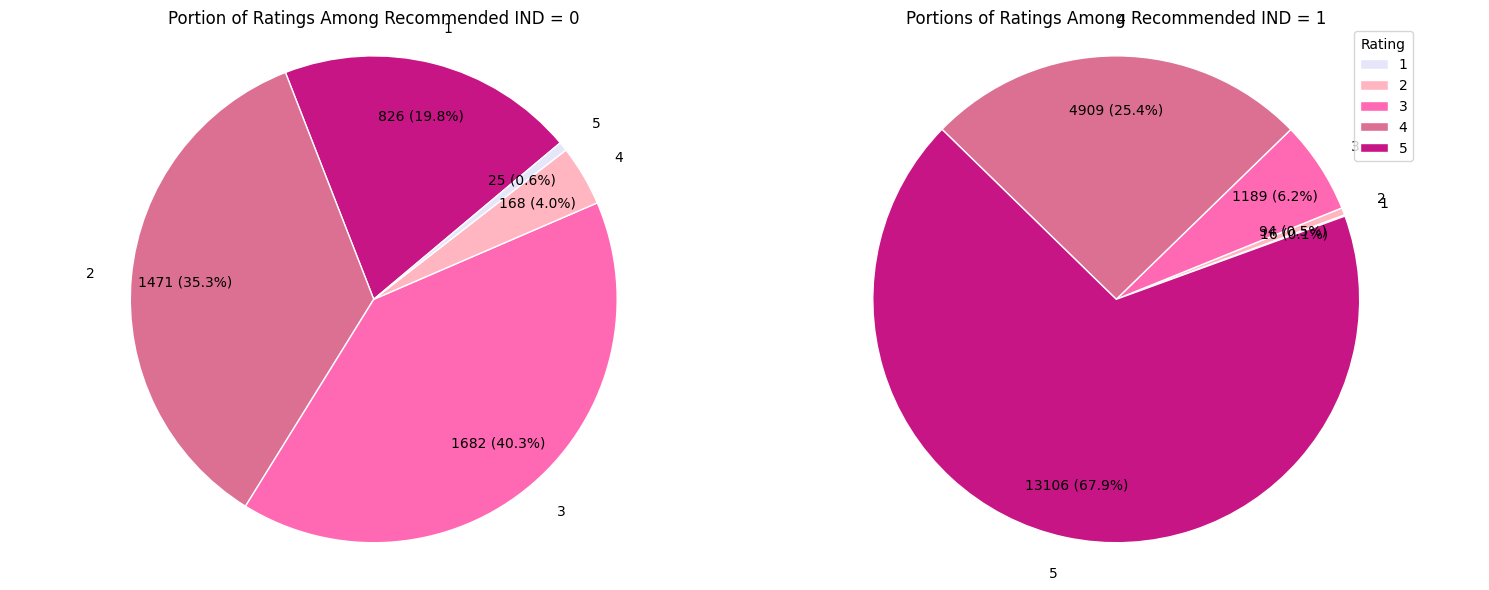

In [ ]:
# --- Pie plots of Ratings split by Recommended IND ---

import matplotlib.pyplot as plt

# Split data
df_recommended_0 = df[df['Recommended IND'] == 0]
df_recommended_1 = df[df['Recommended IND'] == 1]

# Ensure consistent rating order 1→5
rating_order = [1, 2, 3, 4, 5]
sizes_0 = df_recommended_0['Rating'].value_counts().reindex(rating_order, fill_value=0)
sizes_1 = df_recommended_1['Rating'].value_counts().reindex(rating_order, fill_value=0)

# Pink–purple gradients (1=darkest, 5=lightest)
colors_0 = ['#C71585', '#DB7093', '#FF69B4', '#FFB6C1', '#E6E6FA']  # Not Recommended
colors_1 = ['#E6E6FA', '#FFB6C1', '#FF69B4', '#DB7093', '#C71585']  # Recommended

def autopct_with_counts(values):
    total = values.sum()
    def fmt(pct):
        count = int(round(pct * total / 100.0))
        return f'{count} ({pct:.1f}%)' if count > 0 else ''
    return fmt

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Pie: Recommended IND = 0
ax[0].pie(
    sizes_0,
    labels=rating_order,
    colors=colors_0,
    startangle=40,
    labeldistance=1.15,           # move labels outside
    pctdistance=0.78,             # position of percentages
    autopct=autopct_with_counts(sizes_0),
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
ax[0].set_title('Portion of Ratings Among Recommended IND = 0')
ax[0].axis('equal')

# Pie: Recommended IND = 1
ax[1].pie(
    sizes_1,
    labels=rating_order,
    colors=colors_1,
    startangle=20,
    labeldistance=1.15,
    pctdistance=0.78,
    autopct=autopct_with_counts(sizes_1),
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
ax[1].set_title('Portions of Ratings Among Recommended IND = 1')
ax[1].axis('equal')

# One legend for both
fig.legend(
    handles=ax[1].patches[:5],    # first 5 wedges correspond to ratings 1–5
    labels=[str(r) for r in rating_order],
    title="Rating",
    loc="upper right",
    bbox_to_anchor=(0.95, 0.95)
)

plt.tight_layout()
plt.show()


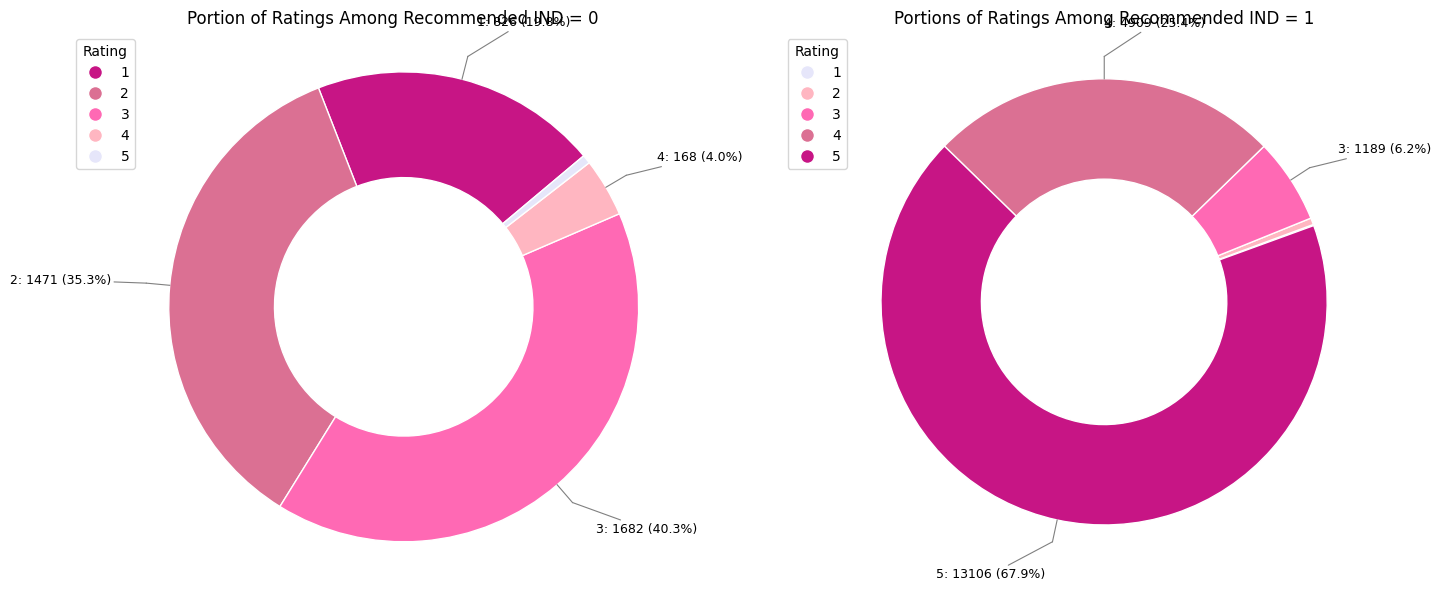

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data prep ---
rating_order = [1, 2, 3, 4, 5]
df_recommended_0 = df[df['Recommended IND'] == 0]
df_recommended_1 = df[df['Recommended IND'] == 1]

sizes_0 = df_recommended_0['Rating'].value_counts().reindex(rating_order, fill_value=0)
sizes_1 = df_recommended_1['Rating'].value_counts().reindex(rating_order, fill_value=0)

# Pink–purple gradients (1=darkest, 5=lightest)
colors_0 = ['#C71585', '#DB7093', '#FF69B4', '#FFB6C1', '#E6E6FA']  # Not Recommended
colors_1 = ['#E6E6FA', '#FFB6C1', '#FF69B4', '#DB7093', '#C71585']  # Recommended

def plot_pie_with_leaders(ax, values, colors, title, startangle=0, min_pct_show=1.0):
    total = values.sum()
    if total == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        return

    # Draw donut (no labels/autopct to avoid overlaps)
    wedges, _ = ax.pie(
        values.values, colors=colors, startangle=startangle,
        labels=None, autopct=None, wedgeprops={'width':0.45, 'edgecolor':'white', 'linewidth':1}
    )
    ax.set_title(title)
    ax.axis('equal')

    # Place annotations outside with leader lines
    outer_r = 1.0         # pie radius
    label_r = 1.25        # radius for label placement (outside the pie)
    for w, rating, count in zip(wedges, values.index, values.values):
        if count == 0:
            continue
        # angle in radians to the middle of the wedge
        ang = np.deg2rad((w.theta2 + w.theta1) / 2.0)
        # label text (count + percent)
        pct = (count / total) * 100.0
        if pct < min_pct_show:
            # too small → put in legend only
            continue
        txt = f"{rating}: {count} ({pct:.1f}%)"

        # label position
        x = label_r * np.cos(ang)
        y = label_r * np.sin(ang)
        ha = 'left' if x >= 0 else 'right'

        # draw a leader line from wedge edge to label
        line_x = (outer_r * np.cos(ang), (outer_r + 0.10) * np.cos(ang))
        line_y = (outer_r * np.sin(ang), (outer_r + 0.10) * np.sin(ang))
        ax.plot(line_x, line_y, color='gray', linewidth=0.8)

        ax.annotate(
            txt, xy=((outer_r + 0.10) * np.cos(ang), (outer_r + 0.10) * np.sin(ang)),
            xytext=(x, y),
            ha=ha, va='center',
            fontsize=9,
            arrowprops=dict(arrowstyle="-", color="gray", lw=0.8, shrinkA=0, shrinkB=0)
        )

    # Legend shows all ratings (including hidden tiny ones)
    handles = [plt.Line2D([0],[0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in colors]
    ax.legend(handles, [str(r) for r in values.index], title="Rating", loc="upper left")

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plot_pie_with_leaders(
    ax[0], sizes_0, colors_0,
    title='Portion of Ratings Among Recommended IND = 0',
    startangle=40, min_pct_show=0.6   # show labels only if ≥ 0.6% to avoid clutter
)

plot_pie_with_leaders(
    ax[1], sizes_1, colors_1,
    title='Portions of Ratings Among Recommended IND = 1',
    startangle=20, min_pct_show=0.6
)

plt.tight_layout()
plt.show()



Observations on Recommendations vs. Ratings

The pie charts above show some clear and interesting patterns:

When products are not recommended (Recommended IND = 0):

As expected, customers who give very low ratings (1 or 2) usually don’t recommend the product.

Many customers who give a rating of 3 also tend not to recommend it, suggesting that an “average” score often means they wouldn’t suggest it to others.

Surprisingly, a few customers give high ratings (4 or even 5) but still do not recommend the product. This mismatch could be worth exploring further.

When products are recommended (Recommended IND = 1):

Most people who recommend a product give it a high rating (4 or 5), which makes sense as it shows strong satisfaction.

However, there are some cases where customers give lower ratings (1–3) but still recommend the product. This might mean that while they had some issues, their overall experience was still positive

**N-gram Extraction Function (Unigrams & Bigrams)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def top_n_ngram(corpus,n = None,ngram = 2): # unigram = bag-of-word, bi-gram
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    # sparse matrix
    n_grams = vec.transform(corpus) #Have the count of  all the words for each review
    sum_features = n_grams.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_features[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

In [ ]:
# Remove NaN values
df['Review Text'] = df['Review Text'].dropna()

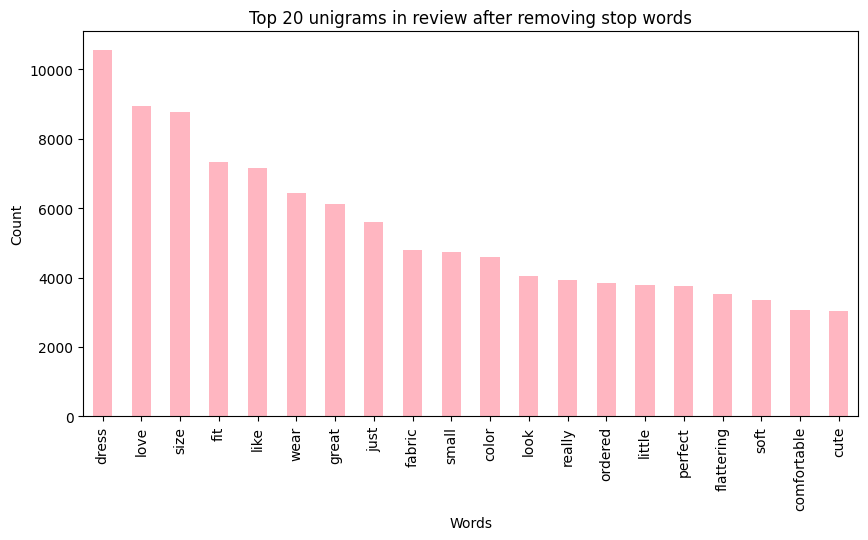

In [ ]:
from matplotlib import pyplot as plt

# Clean text column first
df['Review Text'] = df['Review Text'].fillna("")

common_words = top_n_ngram(df['Review Text'], 20, 1)
df_words = pd.DataFrame(common_words, columns=['ReviewText', 'count'])

plt.figure(figsize=(10,5))
df_words.groupby('ReviewText').sum()['count']\
    .sort_values(ascending=False).plot(
        kind='bar',
        color='#FFB6C1',   # light pink
        title='Top 20 unigrams in review after removing stop words'
    )
plt.ylabel("Count")
plt.xlabel("Words")
plt.show()


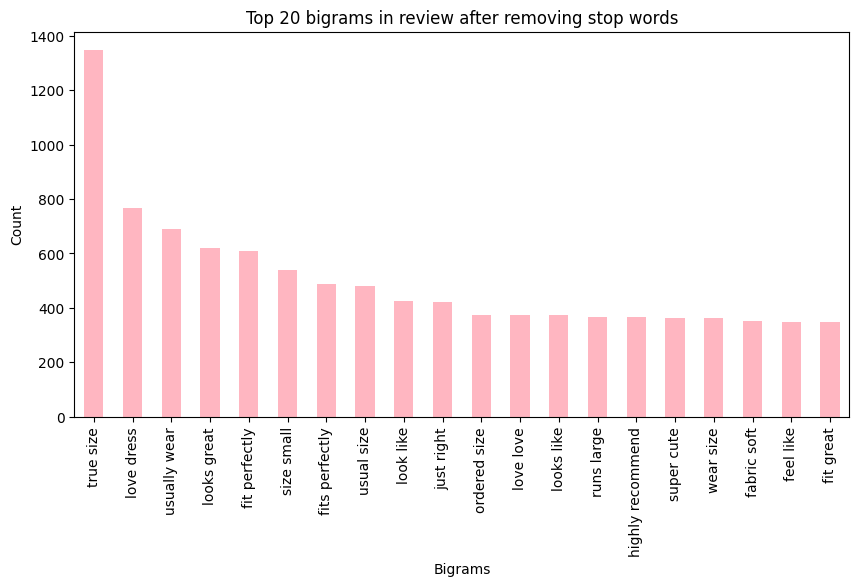

In [ ]:
common_words = top_n_ngram(df['Review Text'], 20, 2)
df_bigrams = pd.DataFrame(common_words, columns=['ReviewText', 'count'])

plt.figure(figsize=(10,5))
df_bigrams.groupby('ReviewText').sum()['count'] \
    .sort_values(ascending=False).plot(
        kind='bar',
        color='#FFB6C1',   # light pink
        title='Top 20 bigrams in review after removing stop words'
    )
plt.ylabel("Count")
plt.xlabel("Bigrams")
plt.show()


Word Clouds for Positive and Negative Reviews

In [ ]:
!pip install wordcloud --quiet
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
# 🧹 Clean the review column (replace missing values with empty string)
df['Review Text'] = df['Review Text'].fillna("")

# ✅ Define sentiment subsets
positive_reviews = df[df['Rating'] >= 4]['Review Text']   # Positive: 4–5 stars
neutral_reviews  = df[df['Rating'] == 3]['Review Text']   # Neutral: exactly 3 stars
negative_reviews = df[df['Rating'] <= 2]['Review Text']   # Negative: 1–2 stars

# Print sample counts
print(f"Positive reviews: {len(positive_reviews)}")
print(f"Neutral reviews:  {len(neutral_reviews)}")
print(f"Negative reviews: {len(negative_reviews)}")


Positive reviews: 18208
Neutral reviews:  2871
Negative reviews: 2407


In [ ]:
# 📝 Join all reviews into one text string per sentiment group
positive_text = " ".join(positive_reviews)   # All positive reviews together
neutral_text  = " ".join(neutral_reviews)    # All neutral reviews together
negative_text = " ".join(negative_reviews)

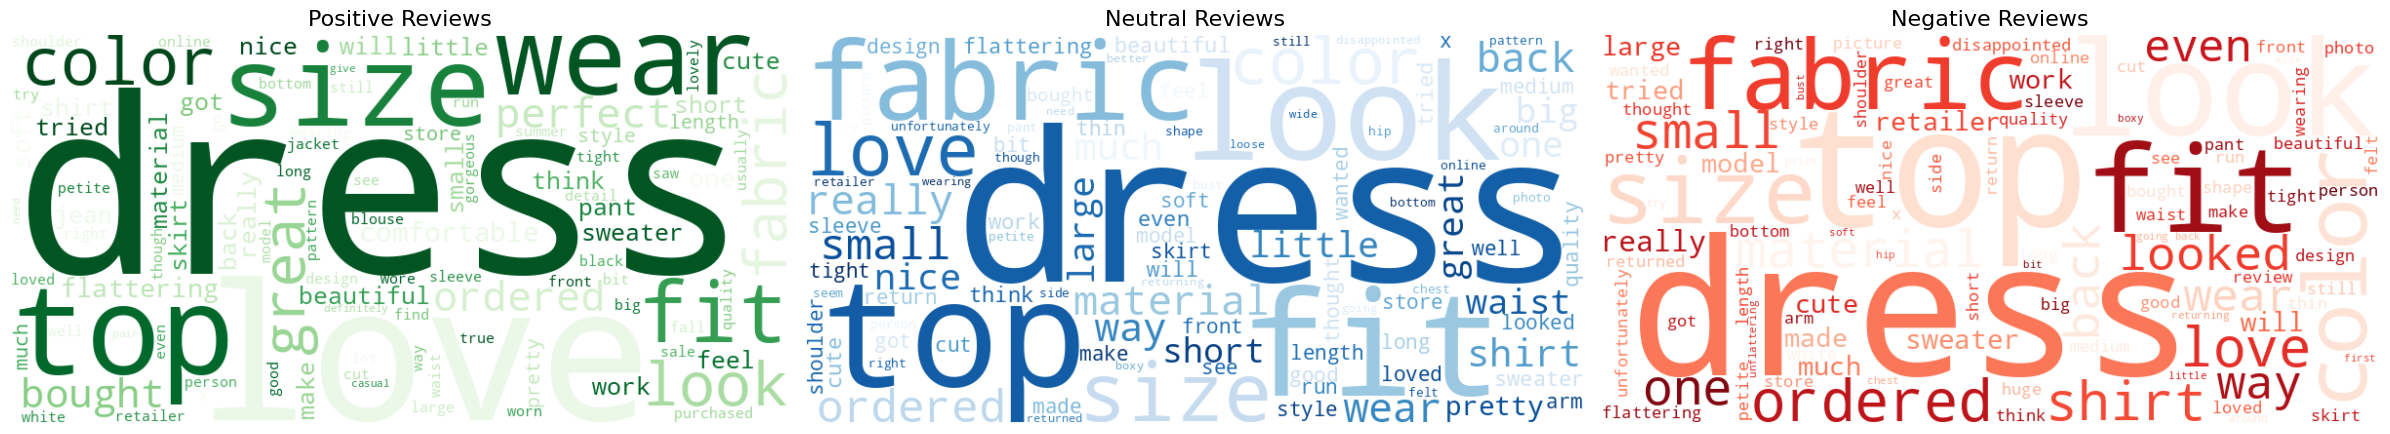

In [ ]:
# 🧹 Clean text column
df['Review Text'] = df['Review Text'].fillna("")

# ✅ Split reviews into groups
positive_reviews = df[df['Rating'] >= 4]['Review Text']
neutral_reviews  = df[df['Rating'] == 3]['Review Text']
negative_reviews = df[df['Rating'] <= 2]['Review Text']

# ✅ Join reviews into single strings
positive_text = " ".join(positive_reviews)
neutral_text  = " ".join(neutral_reviews)
negative_text = " ".join(negative_reviews)

# 🎨 Create Word Clouds for each sentiment
wordcloud_pos = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens',   # Green for positive
    max_words=100
).generate(positive_text)

wordcloud_neu = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Blues',    # Blue/grey for neutral
    max_words=100
).generate(neutral_text)

wordcloud_neg = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',     # Red for negative
    max_words=100
).generate(negative_text)

# 📊 Plot all three word clouds
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Positive
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Reviews', fontsize=16)
axes[0].axis('off')

# Neutral
axes[1].imshow(wordcloud_neu, interpolation='bilinear')
axes[1].set_title('Neutral Reviews', fontsize=16)
axes[1].axis('off')

# Negative
axes[2].imshow(wordcloud_neg, interpolation='bilinear')
axes[2].set_title('Negative Reviews', fontsize=16)
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
# =============================================================================
#  Text Preprocessing Functions
# =============================================================================

print("🔧 SETTING UP TEXT PREPROCESSING")
print("=" * 50)

# Load the small English model from spaCy for tokenization, lemmatization, etc.
nlp = spacy.load("en_core_web_sm")
print("✅ spaCy model loaded")


# -------------------------------------------------------------
# Function to clean basic text noise (URLs, extra spaces)
# -------------------------------------------------------------
def clean_text(text):
    """Basic text cleaning: removes URLs and extra whitespace."""
    if pd.isna(text):
        return ""

    text = str(text)

    # Remove any type of URL from the text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove extra whitespace (e.g., multiple spaces)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# -------------------------------------------------------------
# Function to expand contractions (e.g., "can't" → "cannot")
# -------------------------------------------------------------
def expand_contractions_safe(text):
    """Expand contractions like don't → do not, it's → it is"""
    try:
        return contractions.fix(text)
    except:
        return text  # Return original if expansion fails


# -------------------------------------------------------------
# Function to normalize repeated characters (e.g., "sooo" → "soo")
# -------------------------------------------------------------
def normalize_elongation(text):
    """Reduce elongated words: 'soooo' becomes 'soo'"""
    return re.sub(r'(.)\1{2,}', r'\1\1', text)


# -------------------------------------------------------------
# Function to convert emojis to readable text (e.g., 😍 → smiling face with heart eyes)
# -------------------------------------------------------------
def convert_emojis_to_words(text):
    """
    Convert emojis to text to retain emotional meaning.
    Example: 😍 → 'smiling face with heart eyes'
    """
    text = emoji.demojize(text, language='en')
    return text.replace(":", " ").replace("_", " ")


# -------------------------------------------------------------
# Function to apply advanced preprocessing using spaCy
# Includes tokenization, lemmatization, and custom stopword handling
# -------------------------------------------------------------
def spacy_preprocess(text):
    """Tokenizes and lemmatizes text using spaCy, with custom stopword handling"""

    # Skip if the text is empty or whitespace
    if not text or len(text.strip()) == 0:
        return []

    # Process the text using spaCy NLP pipeline
    doc = nlp(text)
    tokens = []

    # Set of stopwords to KEEP for sentiment analysis (negations and intensifiers)
    keep_stopwords = {
        'not', 'no', 'never', 'nothing', 'neither', 'nowhere', 'none',
        'but', 'however', 'although', 'though', 'yet', 'still',
        'very', 'really', 'quite', 'rather', 'pretty', 'too', 'so'
    }

    for token in doc:
        # Skip punctuation, whitespace, and short words (length < 2)
        if token.is_punct or token.is_space or len(token.text) < 2:
            continue

        # Skip stopwords unless they are in the 'keep' list
        if token.is_stop and token.text.lower() not in keep_stopwords:
            continue

        # Use the lemmatized (base) form of the word, in lowercase
        tokens.append(token.lemma_.lower())

    return tokens


# Confirmation message
print("✅ Preprocessing functions defined")


🔧 SETTING UP TEXT PREPROCESSING
✅ spaCy model loaded
✅ Preprocessing functions defined


In [ ]:
# =============================================================================
#  Apply Complete Preprocessing Pipeline (- TF-IDF)
# =============================================================================
print("🔄 APPLYING COMPLETE PREPROCESSING PIPELINE")
print("=" * 50)

# Start with original dataframe
df_processed = df.copy()

# 1. Apply text preprocessing pipeline
print("Step 1: Cleaning and preprocessing text...")

# Basic cleaning
df_processed['Review Text'] = df_processed['Review Text'].fillna('')
df_processed['Cleaned_Text'] = (
    df_processed['Review Text']
    .apply(clean_text)
    .apply(convert_emojis_to_words)
    .apply(expand_contractions_safe)
    .apply(normalize_elongation)
)

# Advanced preprocessing with spaCy
print("Step 2: Applying spaCy preprocessing...")
df_processed['Tokenized_Text'] = df_processed['Cleaned_Text'].apply(spacy_preprocess)
df_processed['Final_Text'] = df_processed['Tokenized_Text'].apply(lambda x: ' '.join(x))

# 2. Clean up and validate
print("Step 3: Cleaning up and validation...")

# Remove rows where text processing failed
df_processed = df_processed[df_processed['Final_Text'].str.strip().ne('')].copy()
df_processed = df_processed[df_processed['Final_Text'].notna()].copy()

# Create sentiment labels
def map_sentiment(rating):
    if rating in [1, 2]:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df_processed['Sentiment'] = df_processed['Rating'].apply(map_sentiment)

print("✅ Preprocessing pipeline completed!")
print(f"Final dataset shape: {df_processed.shape}")
print(f"Text processing success rate: {len(df_processed)/len(df)*100:.1f}%")

# Show sample of processed text
print("\n📋 Sample of processed text:")
print(df_processed[['Review Text', 'Final_Text']].head(3))


🔄 APPLYING COMPLETE PREPROCESSING PIPELINE
Step 1: Cleaning and preprocessing text...
Step 2: Applying spaCy preprocessing...
Step 3: Cleaning up and validation...
✅ Preprocessing pipeline completed!
Final dataset shape: (22641, 15)
Text processing success rate: 96.4%

📋 Sample of processed text:
                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   

                                          Final_Text  
0        absolutely wonderful silky sexy comfortable  
1  love dress soo pretty happen find store glad n...  
2  high hope dress really want work initially ord...  


# **Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_processed['Final_Text']
y = df_processed['Sentiment']

# Train-test split (e.g., 80/20)
X_text_train, X_text_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Create TF-IDF Features

In [ ]:
# =============================================================================
#  Create TF-IDF Features
# =============================================================================
print("📝 CREATING TF-IDF FEATURES")
print("=" * 50)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    sublinear_tf=True,
    lowercase=True,
    strip_accents='unicode'
)

# Fit and transform
print("Fitting TF-IDF vectorizer...")
X_train_tfidf = tfidf.fit_transform(X_text_train)
X_test_tfidf = tfidf.transform(X_text_test)

print(f"✅ TF-IDF features created:")
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.get_feature_names_out())}")


📝 CREATING TF-IDF FEATURES
Fitting TF-IDF vectorizer...
✅ TF-IDF features created:
Training TF-IDF shape: (18112, 5000)
Test TF-IDF shape: (4529, 5000)
Vocabulary size: 5000


# **Model 1: Logistic Regression **

📌 Logistic Regression Results
Accuracy: 0.8226981673658644
F1 Score (macro): 0.5737961941525286

Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.45      0.52       474
     Neutral       0.42      0.22      0.29       565
    Positive       0.87      0.97      0.92      3490

    accuracy                           0.82      4529
   macro avg       0.63      0.54      0.57      4529
weighted avg       0.79      0.82      0.80      4529



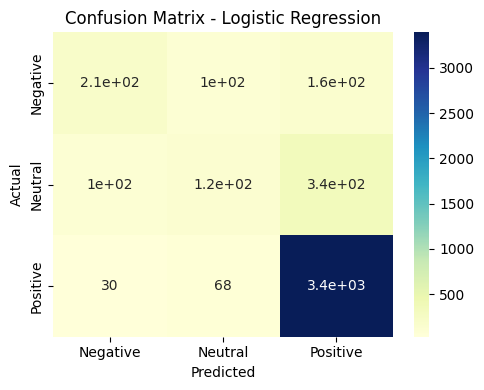

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names based on sentiment encoding
class_names = ['Negative', 'Neutral', 'Positive']

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score (macro):", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# Tune the Model LR

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters from Random Search:
{'C': np.float64(0.0745934328572655)}

📌 Logistic Regression (Random Search Tuned)
Accuracy: 0.7677191432987415
F1 Score (macro): 0.6042300017136016

Classification Report:
               precision    recall  f1-score   support

    Negative       0.49      0.62      0.54       474
     Neutral       0.32      0.48      0.38       565
    Positive       0.95      0.84      0.89      3490

    accuracy                           0.77      4529
   macro avg       0.58      0.64      0.60      4529
weighted avg       0.82      0.77      0.79      4529



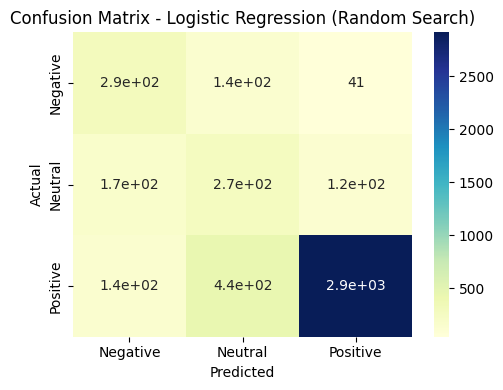

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names for display
class_names = ['Negative', 'Neutral', 'Positive']

# -------------------------------
# 1. Define Search Space for Random Search
# -------------------------------
param_dist = {
    'C': loguniform(1e-3, 1e2),  # Regularization strength
}

# -------------------------------
# 2. Base Model Setup
# -------------------------------
lr_base = LogisticRegression(
    solver='saga',                  # supports L1/L2 regularization
    multi_class='multinomial',     # handles 3+ class text well
    class_weight='balanced',       # handles class imbalance
    max_iter=5000,
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# 3. Cross-Validation Strategy
# -------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------
# 4. Perform Randomized Search
# -------------------------------
random_search_lr = RandomizedSearchCV(
    estimator=lr_base,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# -------------------------------
# 5. Fit on TF-IDF
# -------------------------------
random_search_lr.fit(X_train_tfidf, y_train)

# Best hyperparameters
print("✅ Best Parameters from Random Search:")
print(random_search_lr.best_params_)

# -------------------------------
# 6. Predict & Evaluate
# -------------------------------
best_lr = random_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_tfidf)

print("\n📌 Logistic Regression (Random Search Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score (macro):", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=class_names))

# -------------------------------
# 7. Confusion Matrix Plot
# -------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Logistic Regression (Random Search)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


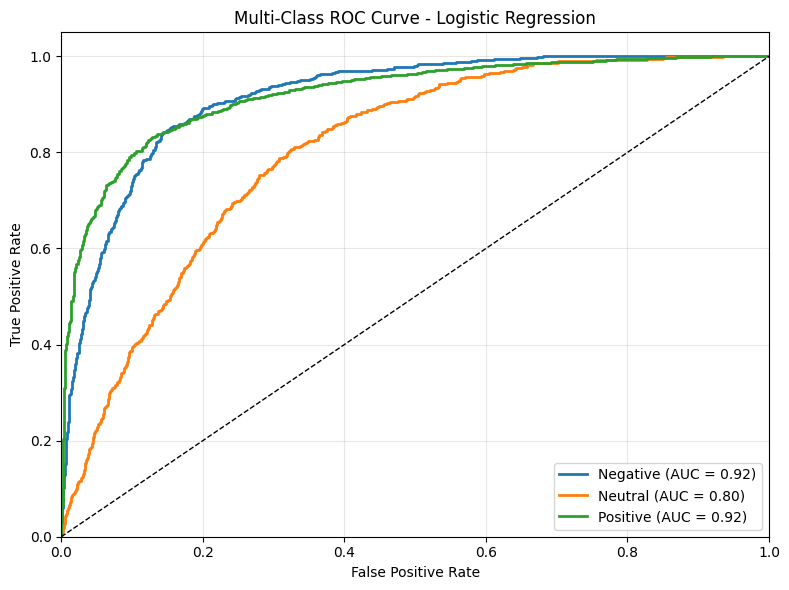

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 1. Predict probabilities for each class
y_score = best_lr.predict_proba(X_test_tfidf)

# 2. Binarize the test labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 3 classes

# 3. Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Model 2: Linear SVM **

📌 Linear SVM Results
Accuracy: 0.8134245970412894
F1 Score (macro): 0.5699211076280042

Classification Report:
               precision    recall  f1-score   support

    Negative       0.55      0.47      0.51       474
     Neutral       0.36      0.23      0.28       565
    Positive       0.89      0.95      0.92      3490

    accuracy                           0.81      4529
   macro avg       0.60      0.55      0.57      4529
weighted avg       0.79      0.81      0.80      4529



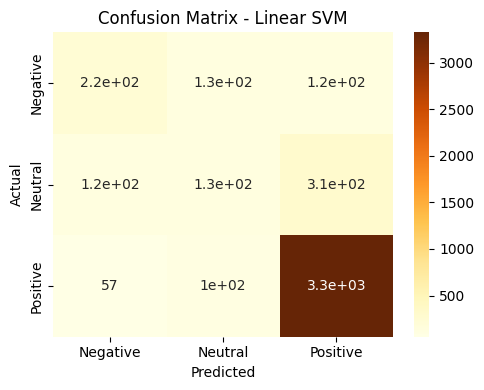

In [ ]:
from sklearn.svm import LinearSVC
# Define class names based on sentiment encoding
class_names = ['Negative', 'Neutral', 'Positive']

# Initialize model
svm_model = LinearSVC(C=1.0, max_iter=10000, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
print("📌 Linear SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score (macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='YlOrBr',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# **TUNE SVM MODEL**

Fitting 5 folds for each of 40 candidates, totalling 200 fits
📌 Tuned Linear SVM Results
Best Parameters: {'C': np.float64(0.4205156450913872), 'max_iter': 1000}
Accuracy: 0.8238021638330757
F1 Score (macro): 0.5799176295973544

Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.49      0.53       474
     Neutral       0.41      0.22      0.28       565
    Positive       0.88      0.97      0.92      3490

    accuracy                           0.82      4529
   macro avg       0.63      0.56      0.58      4529
weighted avg       0.79      0.82      0.80      4529



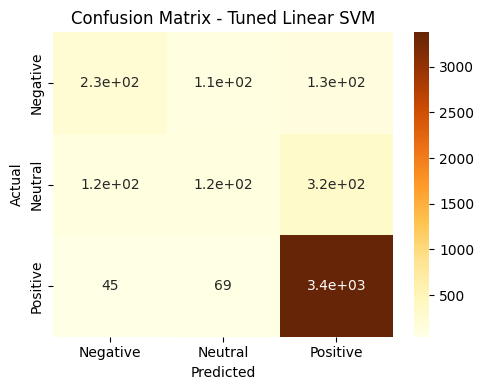

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['Negative', 'Neutral', 'Positive']

# Define parameter space for tuning
param_dist = {
    'C': loguniform(1e-3, 1e2),         # Regularization strength (0.001 to 100)
    'max_iter': [1000, 5000, 10000],    # Number of iterations
}

# Initialize base model
base_svm = LinearSVC(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_svm,
    param_distributions=param_dist,
    n_iter=40,                # Number of random combinations to try
    scoring='f1_macro',       # Optimize for macro F1-score
    cv=5,                     # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,                # Use all available cores
    random_state=42
)

# Fit model on training data
random_search.fit(X_train_tfidf, y_train)

# Best model after tuning
best_svm = random_search.best_estimator_

# Predict on test data
y_pred_svm = best_svm.predict(X_test_tfidf)

# Evaluation
print("📌 Tuned Linear SVM Results")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score (macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='YlOrBr',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Tuned Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


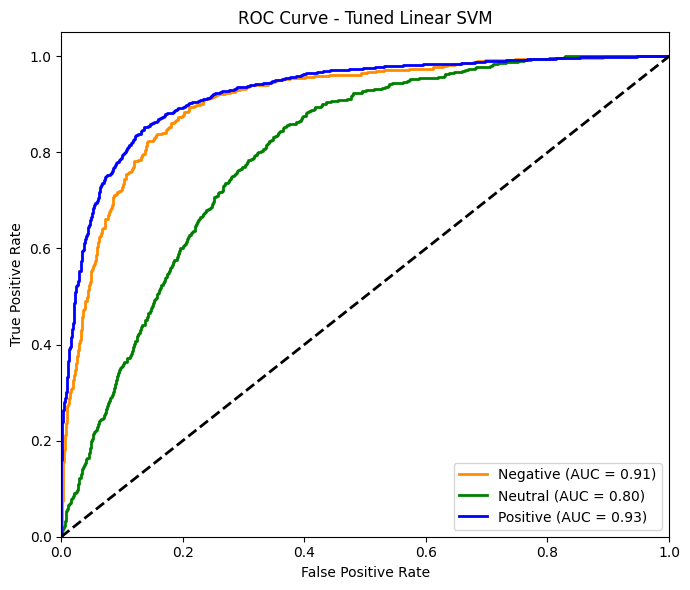

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize the output (needed for ROC curve in multiclass)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])   # 0=Negative, 1=Neutral, 2=Positive
n_classes = y_test_bin.shape[1]

# Get decision scores from LinearSVC
y_score = best_svm.decision_function(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# === Plot ROC curves for each class ===
plt.figure(figsize=(7, 6))
colors = ['darkorange', 'green', 'blue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal line (chance level)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Linear SVM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## XGBoost Model

In [ ]:
# Run this if you haven't installed XGBoost
!pip install xgboost --quiet


📌 XGBoost Results
Accuracy: 0.8145285935085008
F1 Score (macro): 0.5462914204935004

Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.35      0.44       474
     Neutral       0.44      0.21      0.29       565
    Positive       0.85      0.98      0.91      3490

    accuracy                           0.81      4529
   macro avg       0.63      0.51      0.55      4529
weighted avg       0.78      0.81      0.78      4529



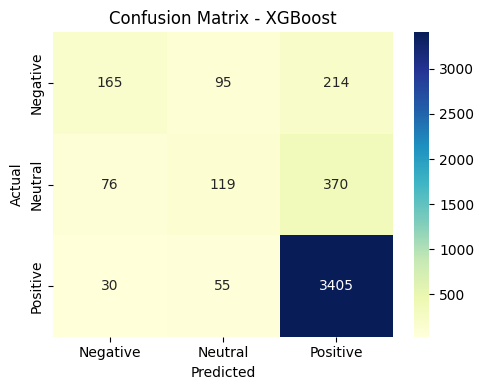

In [ ]:
# ====================================================
# ✅ Imports
# ====================================================
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====================================================
# ✅ Class names based on sentiment encoding
# ====================================================
class_names = ['Negative', 'Neutral', 'Positive']

# ====================================================
# ✅ Convert TF-IDF matrices to dense format (XGBoost needs dense for sparse CSR input)
# Optional: only if you face errors — some versions of XGBoost handle sparse well.
# X_train_dense = X_train_tfidf.toarray()
# X_test_dense = X_test_tfidf.toarray()

# ====================================================
# ✅ Initialize XGBoost Classifier
# ====================================================
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',   # For direct class output
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# ====================================================
# ✅ Fit the model
# ====================================================
xgb_model.fit(X_train_tfidf, y_train)  # Or X_train_dense if needed

# ====================================================
# ✅ Predict on test data
# ====================================================
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# ====================================================
# ✅ Evaluation
# ====================================================
print("📌 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=class_names))

# ====================================================
# ✅ Confusion Matrix
# ====================================================
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# **TUNE XGBoost Model**

Fitting 3 folds for each of 15 candidates, totalling 45 fits
📌 Tuned XGBoost Results
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.8178405829101347
F1 Score (macro): 0.56111392879352

Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.39      0.47       474
     Neutral       0.41      0.23      0.30       565
    Positive       0.87      0.97      0.92      3490

    accuracy                           0.82      4529
   macro avg       0.63      0.53      0.56      4529
weighted avg       0.78      0.82      0.79      4529



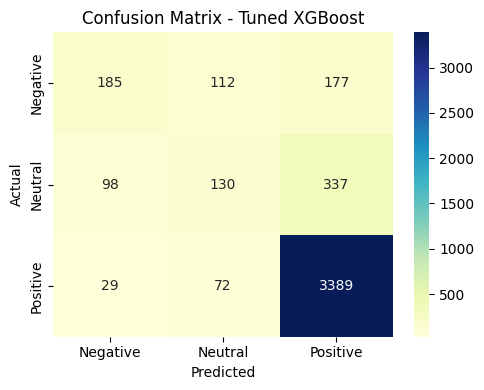

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize base model
xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=15,  # Try 15 random combinations
    scoring='f1_macro',  # Optimize for F1 macro
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train_tfidf, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test_tfidf)

# Evaluation
print("📌 Tuned XGBoost Results")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


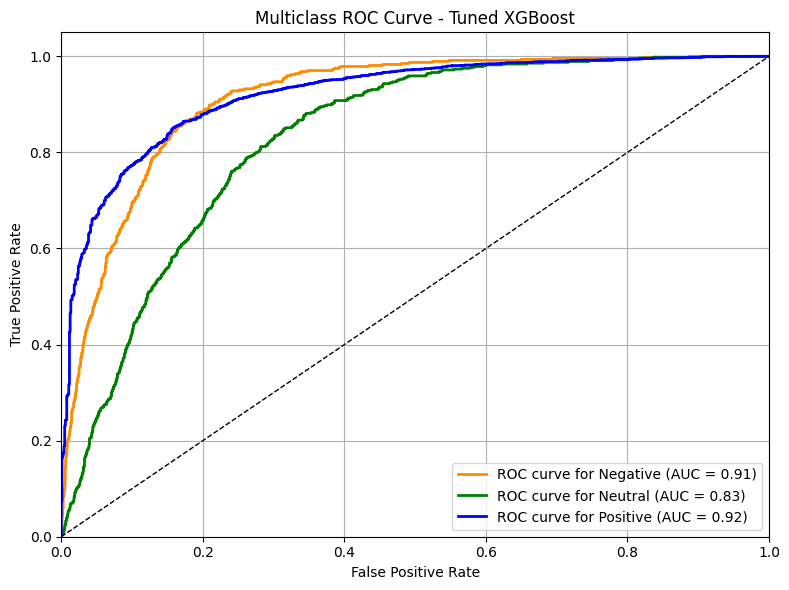

📊 Macro AUC Score: 0.8875


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Ensure your best model uses softprob (update manually if needed)
best_xgb.objective = 'multi:softprob'  # Important
best_xgb.fit(X_train_tfidf, y_train)   # Re-fit with softprob just to be sure

# Get predicted probabilities
y_proba = best_xgb.predict_proba(X_test_tfidf)

# One-hot encode the test labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue']
class_names = ['Negative', 'Neutral', 'Positive']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Tuned XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro-average AUC
macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print("📊 Macro AUC Score:", round(macro_auc, 4))


# CREATE INTERFACE WITH LOGISTIC REGRESSION

In [ ]:
!pip install gradio --quiet

import joblib
import gradio as gr

# Load model and vectorizer
model = joblib.load("logistic_model_tfidf.pkl")       # <- your saved logistic regression model
tfidf = joblib.load("tfidf_vectorizer.pkl")           # <- your saved TF-IDF vectorizer

# Label mapping (same order used in your training)
label_map = {
    0: "Negative 😠",
    1: "Neutral 😐",
    2: "Positive 😊"
}

# Prediction function
def predict_sentiment(text):
    if not text.strip():
        return "Please enter a valid review."
    vec = tfidf.transform([text])
    pred = model.predict(vec)[0]
    return f"Prediction: {label_map.get(pred, 'Unknown')}"

# Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Type your review here..."),
    outputs="text",
    title="Sentiment Classifier (Logistic Regression)",
    description="Enter a review and get sentiment prediction: Negative, Neutral, or Positive."
)

# Launch app
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b4bbdc09671b268098.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
